In [1]:
import pandas as pd
import geopandas as gpd
from shapely.geometry import Point

In [2]:
crime_df = pd.read_csv("cleaned_crime_incidents.csv")
crime_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\328209975.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  crime_df = pd.read_csv("cleaned_crime_incidents.csv")


,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,Victim_Race,Victim_Ethnicity,Victim_County_Resident,Mapped_Location,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported
0,-9671214.721,4321556.544,1,20180018401_11,20180018401,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37209.0,17,2018-01-06 17:00:00+00:00,2018/01/06 17:43:00+00
1,-9648505.545,4307641.164,2,20180018380_11,20180018380,D,DISPATCHED,U,UNFOUNDED,Closed,...,W,Non-Hispanic,NON RESIDENT,NaN,NaN,NaN,37013.0,17,2018-01-06 16:00:00+00:00,2018/01/06 17:50:00+00
2,-9641826.376,4312048.062,3,20180019944_11,20180019944,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37217.0,07,2018-01-07 06:11:00+00:00,2018/01/07 08:09:00+00
3,-9668765.692,4322797.398,4,20180015642_11,20180015642,D,DISPATCHED,U,UNFOUNDED,Closed,...,W,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37209.0,17,2018-01-05 20:23:00+00:00,2018/01/05 21:07:00+00
4,-9664646.871,4322935.279,5,20180018912_11,20180018912,D,DISPATCHED,U,UNFOUNDED,Closed,...,B,Non-Hispanic,RESIDENT,NaN,NaN,NaN,37208.0,17,2018-01-06 21:52:00+00:00,2018/01/06 23:12:00+00


In [3]:
# clean time 
crime_df['Incident_Occurred'] = pd.to_datetime(crime_df['Incident_Occurred'], errors='coerce')
crime_df['Incident_Reported'] = pd.to_datetime(crime_df['Incident_Reported'], errors='coerce')

In [4]:
# seperate time 
crime_df['Year'] = crime_df['Incident_Occurred'].dt.year
crime_df['Month'] = crime_df['Incident_Occurred'].dt.month
crime_df['Hour'] = crime_df['Incident_Occurred'].dt.hour
crime_df['Weekday'] = crime_df['Incident_Occurred'].dt.day_name()


In [5]:
# 导出整合后的清洗结果
crime_df.to_csv("crime_incidents_cleaned_with_time.csv", index=False)


In [6]:
# 读取报警数据
calls_df = pd.read_csv("combined_calls_data.csv", low_memory=False)

In [7]:
# 查看时间字段长什么样
calls_df[['Call_Received']].head()

,Call_Received
0,2/13/2018 2:03:46 PM
1,7/11/2018 7:07:27 AM
2,11/8/2018 5:26:30 PM
3,9/10/2018 12:52:48 PM
4,12/19/2018 1:46:17 AM


In [8]:
# 清洗并解析 Call_Received 字段为时间格式
calls_df['Call_Received'] = pd.to_datetime(
    calls_df['Call_Received'],
    format="%m/%d/%Y %I:%M:%S %p",  # 明确指定格式
    errors='coerce'
)

In [9]:
# 提取时间字段
calls_df['Year'] = calls_df['Call_Received'].dt.year
calls_df['Year'].head()

0    2018
1    2018
2    2018
3    2018
4    2018
Name: Year, dtype: int32

In [10]:
calls_df['Month'] = calls_df['Call_Received'].dt.month
calls_df['Month'].head()

0     2
1     7
2    11
3     9
4    12
Name: Month, dtype: int32

In [11]:
calls_df['Hour'] = calls_df['Call_Received'].dt.hour
calls_df['Hour'].head()

0    14
1     7
2    17
3    12
4     1
Name: Hour, dtype: int32

In [12]:
calls_df['Weekday'] = calls_df['Call_Received'].dt.day_name()
calls_df['Weekday'].head()

0      Tuesday
1    Wednesday
2     Thursday
3       Monday
4    Wednesday
Name: Weekday, dtype: object

In [27]:
import geopandas as gpd

zip_gdf = gpd.read_file("nashville_zipcodes.geojson")
zip_gdf = zip_gdf.to_crs("EPSG:4326")  # 转换坐标系为 WGS84
zip_gdf.head()


,OBJECTID,ZipCode,POName,GlobalID,geometry
0,229,37115,MADISON,9492b2a0-dff5-4e2e-b77b-37c25b5c96f3,"POLYGON ((-86.68725 36.31821, -86.68722 36.318..."
1,230,37206,NASHVILLE,3a287c8d-543c-4f6e-8463-27bf9c3d8356,"POLYGON ((-86.75348 36.16274, -86.75383 36.162..."
2,231,37216,NASHVILLE,c3501fa2-5146-4881-95ac-0f36b9da82af,"POLYGON ((-86.73451 36.23774, -86.73425 36.237..."
3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a,"POLYGON ((-86.77787 36.17706, -86.7781 36.1765..."
4,233,37086,LA VERGNE,c3ccae22-29a2-4599-9241-72cddd64a35a,"POLYGON ((-86.5887 36.02671, -86.58837 36.0264..."


In [28]:

# ✅ 更快方式：使用 zip() 和 list comprehension 向量化创建 geometry
calls_df['geometry'] = [Point(xy) for xy in zip(calls_df['Longitude'], calls_df['Latitude'])]


In [29]:

# 创建 GeoDataFrame
calls_gdf = gpd.GeoDataFrame(calls_df, geometry='geometry', crs='EPSG:4326')

In [30]:
# 确保 zip_gdf 坐标系已转过
zip_gdf = zip_gdf.to_crs(calls_gdf.crs)
zip_gdf.head()

,OBJECTID,ZipCode,POName,GlobalID,geometry
0,229,37115,MADISON,9492b2a0-dff5-4e2e-b77b-37c25b5c96f3,"POLYGON ((-86.68725 36.31821, -86.68722 36.318..."
1,230,37206,NASHVILLE,3a287c8d-543c-4f6e-8463-27bf9c3d8356,"POLYGON ((-86.75348 36.16274, -86.75383 36.162..."
2,231,37216,NASHVILLE,c3501fa2-5146-4881-95ac-0f36b9da82af,"POLYGON ((-86.73451 36.23774, -86.73425 36.237..."
3,232,37213,NASHVILLE,b50f3ab3-9571-4457-b059-68ef9bd0b13a,"POLYGON ((-86.77787 36.17706, -86.7781 36.1765..."
4,233,37086,LA VERGNE,c3ccae22-29a2-4599-9241-72cddd64a35a,"POLYGON ((-86.5887 36.02671, -86.58837 36.0264..."


In [31]:

# ✅ 空间连接：把 ZIP 代码匹配进报警数据
calls_with_zip = gpd.sjoin(calls_gdf, zip_gdf[['ZipCode', 'geometry']], how='left', predicate='within')
calls_with_zip.head()

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Call_Received,x,y,Year,Month,Hour,Weekday,geometry,index_right,ZipCode
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,2018-02-13 14:03:46,-86.779,36.037,2018,2,14,Tuesday,POINT (-86.779 36.037),10.0,37027
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,2018-07-11 07:07:27,-86.779,36.037,2018,7,7,Wednesday,POINT (-86.779 36.037),10.0,37027
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,2018-11-08 17:26:30,-86.779,36.037,2018,11,17,Thursday,POINT (-86.779 36.037),10.0,37027
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,2018-09-10 12:52:48,-86.779,36.037,2018,9,12,Monday,POINT (-86.779 36.037),10.0,37027
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,2018-12-19 01:46:17,-86.779,36.037,2018,12,1,Wednesday,POINT (-86.779 36.037),10.0,37027


In [ ]:

# ✅ 导出包含 ZIP 的新文件
calls_with_zip.to_csv("calls_with_zipcode.csv", index=False)

## ZIP codes with higher call volumes → more confirmed incidents?

In [32]:
calls_df = pd.read_csv("calls_with_zipcode.csv")
calls_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\1601288882.py:1: DtypeWarning: Columns (4,14) have mixed types. Specify dtype option on import or set low_memory=False.
  calls_df = pd.read_csv("calls_with_zipcode.csv")


,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Call_Received,x,y,Year,Month,Hour,Weekday,geometry,index_right,ZipCode
0,1,PD201800160242,NaN,92,FIXED POST,P,PROGRESS,9T,NaN,NaN,...,2018-02-13 14:03:46,-86.779,36.037,2018,2,14,Tuesday,POINT (-86.779 36.037),10.0,37027.0
1,2,PD201800687980,NaN,40,SUSPICIOUS PERSON,PV,NaN,4,ASSISTED CITIZEN,NaN,...,2018-07-11 07:07:27,-86.779,36.037,2018,7,7,Wednesday,POINT (-86.779 36.037),10.0,37027.0
2,3,PD201801086308,NaN,43,WANT OFFICER FOR INVESTIGATION / ASSISTA,P,PROGRESS,5,GONE ON ARRIVAL,NaN,...,2018-11-08 17:26:30,-86.779,36.037,2018,11,17,Thursday,POINT (-86.779 36.037),10.0,37027.0
3,4,PD201800894386,NaN,40,SUSPICIOUS PERSON,P,PROGRESS,11,DISREGARD / SIGNAL 9,NaN,...,2018-09-10 12:52:48,-86.779,36.037,2018,9,12,Monday,POINT (-86.779 36.037),10.0,37027.0
4,5,PD201801211177,NaN,40,SUSPICIOUS PERSON,PV,NaN,5,GONE ON ARRIVAL,NaN,...,2018-12-19 01:46:17,-86.779,36.037,2018,12,1,Wednesday,POINT (-86.779 36.037),10.0,37027.0


In [33]:
crimes_df = pd.read_csv("crime_incidents_cleaned_with_time.csv")
crimes_df.head()

C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\308751570.py:1: DtypeWarning: Columns (32) have mixed types. Specify dtype option on import or set low_memory=False.
  crimes_df = pd.read_csv("crime_incidents_cleaned_with_time.csv")


,X,Y,OBJECTID,Primary_Key,Incident_Number,Report_Type,Report_Type_Description,Incident_Status_Code,Incident_Status_Description,Investigation_Status,...,POINT_X,POINT_Y,ZIP_Code,Weapon_Primary,Incident_Occurred,Incident_Reported,Year,Month,Hour,Weekday
0,-9671214.721,4321556.544,1,20180018401_11,20180018401,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37209.0,17,2018-01-06 17:00:00+00:00,2018-01-06 17:43:00+00:00,2018,1,17,Saturday
1,-9648505.545,4307641.164,2,20180018380_11,20180018380,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37013.0,17,2018-01-06 16:00:00+00:00,2018-01-06 17:50:00+00:00,2018,1,16,Saturday
2,-9641826.376,4312048.062,3,20180019944_11,20180019944,D,DISPATCHED,R,REFUSED TO COOPERATE,Closed,...,NaN,NaN,37217.0,07,2018-01-07 06:11:00+00:00,2018-01-07 08:09:00+00:00,2018,1,6,Sunday
3,-9668765.692,4322797.398,4,20180015642_11,20180015642,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37209.0,17,2018-01-05 20:23:00+00:00,2018-01-05 21:07:00+00:00,2018,1,20,Friday
4,-9664646.871,4322935.279,5,20180018912_11,20180018912,D,DISPATCHED,U,UNFOUNDED,Closed,...,NaN,NaN,37208.0,17,2018-01-06 21:52:00+00:00,2018-01-06 23:12:00+00:00,2018,1,21,Saturday


In [41]:
# 标准化 ZipCode 列名（统一成 ZipCode）
calls_df.rename(columns={'ZipCode': 'ZipCode'}, inplace=True)  # 保持原样

In [42]:
crimes_df.rename(columns={'ZIP_Code': 'ZipCode'}, inplace=True)

In [43]:
# 确保时间列是 datetime 类型
calls_df['Call_Received'] = pd.to_datetime(calls_df['Call_Received'], errors='coerce')

In [44]:
crimes_df['Incident_Occurred'] = pd.to_datetime(crimes_df['Incident_Occurred'], errors='coerce')

In [45]:
calls_df['Year'] = calls_df['Call_Received'].dt.year

In [46]:
crimes_df['Year'] = crimes_df['Incident_Occurred'].dt.year

In [47]:
# 类型统一为字符串
calls_df['ZipCode'] = calls_df['ZipCode'].astype(str)
crimes_df['ZipCode'] = crimes_df['ZipCode'].astype(str)

In [48]:
# 按 ZipCode 和 Year 聚合总报警数量
calls_grouped = calls_df.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Calls')
calls_grouped.head()

,ZipCode,Year,Total_Calls
0,37013.0,2018,11183
1,37013.0,2019,10755
2,37013.0,2020,9517
3,37013.0,2021,8
4,37015.0,2018,16


In [49]:
# 统计每年每个 ZipCode 的犯罪数量
crimes_grouped = crimes_df.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Crimes')
crimes_grouped.head()

,ZipCode,Year,Total_Crimes
0,0.0,2023,1
1,15213.0,2022,1
2,17202,2023,1
3,19082.0,2023,1
4,19153.0,2022,1


In [50]:
# 合并两个统计结果
combined = pd.merge(calls_grouped, crimes_grouped, on=['ZipCode', 'Year'], how='inner')
combined.head()

,ZipCode,Year,Total_Calls,Total_Crimes
0,37013.0,2018,11183,6164
1,37013.0,2019,10755,5745
2,37013.0,2020,9517,5676
3,37013.0,2021,8,5861
4,37015.0,2018,16,37


In [51]:
combined['Crime_to_Call_Ratio'] = combined['Total_Crimes'] / combined['Total_Calls']
combined['Crime_to_Call_Ratio']

0        0.551194
1        0.534170
2        0.596406
3      732.625000
4        2.312500
          ...    
115    318.000000
116      0.064760
117      0.082313
118      0.112615
119    146.361979
Name: Crime_to_Call_Ratio, Length: 120, dtype: float64

In [52]:
combined.to_csv("zip_crime_call_analysis.csv", index=False)


In [54]:
combined_filtered = combined[combined['Total_Calls'] >= 100]


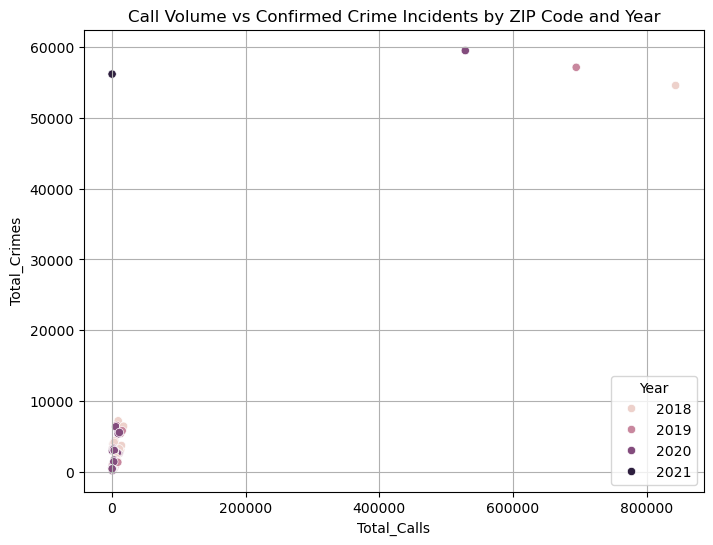

In [55]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.scatterplot(data=combined_filtered, x='Total_Calls', y='Total_Crimes', hue='Year')
plt.title('Call Volume vs Confirmed Crime Incidents by ZIP Code and Year')
plt.grid(True)
plt.show()


##"The scatterplot shows a clear positive relationship between call volumes and confirmed crime incidents across ZIP codes from 2018 to 2021."

##"This indicates that areas with high emergency call volumes tend to experience more confirmed incidents, supporting the idea that 911 call patterns can help anticipate areas of elevated crime risk."

##"A few outliers with extremely high call volumes may represent data concentration in central dispatching zones and should be reviewed separately."

In [63]:
# 所有年份都纳入，设置条件：通话量 >= 100，犯罪比率小于 5（防止离谱值）
ratio_all = combined[
    (combined['Total_Calls'] >= 100) &
    (combined['Crime_to_Call_Ratio'].notna()) &
    (combined['Crime_to_Call_Ratio'] < 5)
].copy()


In [64]:

# 取前 20 个犯罪确认率最高的 ZIP-Year 组合
top20_zip = ratio_all.sort_values(by='Crime_to_Call_Ratio', ascending=False).head(20)

# 打印确认
top20_zip[['ZipCode', 'Year', 'Total_Calls', 'Total_Crimes', 'Crime_to_Call_Ratio']]


,ZipCode,Year,Total_Calls,Total_Crimes,Crime_to_Call_Ratio
56,37206.0,2020,795,2956,3.718239
55,37206.0,2019,1201,3301,2.748543
54,37206.0,2018,1571,3936,2.505411
103,37219.0,2018,468,871,1.861111
12,37072.0,2020,208,380,1.826923
105,37219.0,2020,296,521,1.760135
104,37219.0,2019,514,820,1.595331
11,37072.0,2019,320,493,1.540625
10,37072.0,2018,342,520,1.520468
62,37208.0,2019,3029,3926,1.296137


C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\3379161196.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


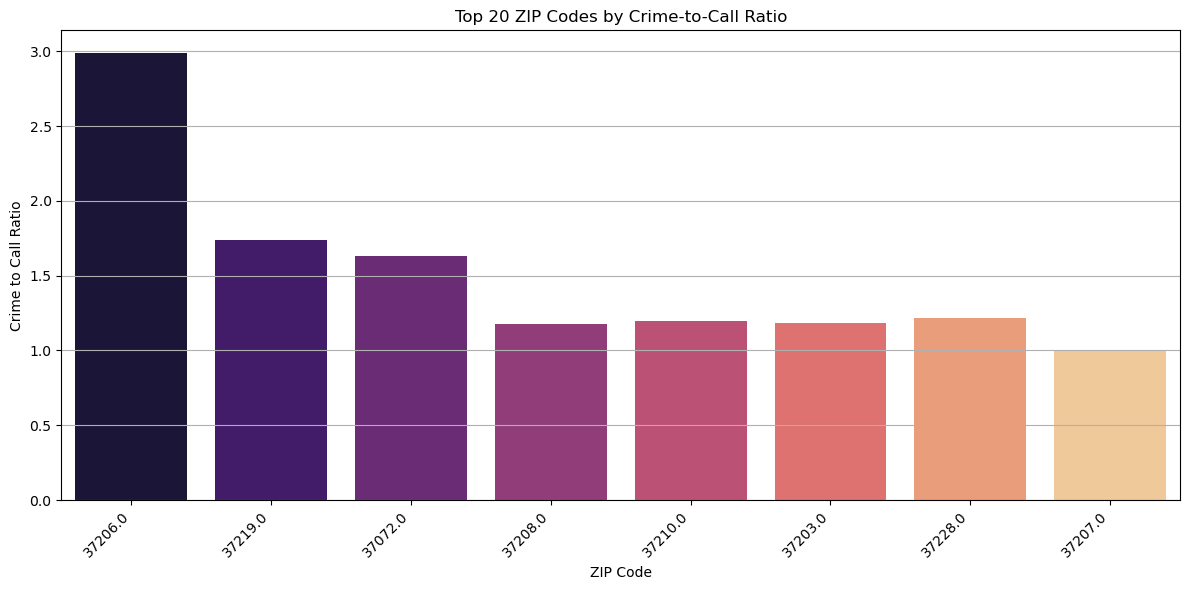

In [66]:
import seaborn as sns
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(12, 6))
sns.barplot(
    data=top20_zip,
    x='ZipCode',
    y='Crime_to_Call_Ratio',
    palette='magma',
    errorbar=None  # 新版 seaborn 用这个替代 ci=None，避免画误差棒
)

plt.title('Top 20 ZIP Codes by Crime-to-Call Ratio')
plt.xlabel('ZIP Code')
plt.ylabel('Crime to Call Ratio')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y')
plt.tight_layout()
plt.show()


In [67]:
top20_zip.to_csv("top20_zip_crime_to_call_ratio.csv", index=False)


## Which ZIP codes have experienced the most significant increase in call volumes and incident reports from 2018 to 2024?

In [83]:
import pandas as pd

# 加载原始通话数据
calls_df = pd.read_csv("combined_calls_data.csv", low_memory=False)



In [84]:
calls_df['Call_Received'] = pd.to_datetime(
    calls_df['Call_Received'], 
    format="%m/%d/%Y %I:%M:%S %p", 
    errors='coerce'
)


In [86]:
calls_df['Year'] = calls_df['Call_Received'].dt.year
calls_df['Year'] 

0          2018
1          2018
2          2018
3          2018
4          2018
           ... 
2460986    2020
2460987    2020
2460988    2020
2460989    2020
2460990    2020
Name: Year, Length: 2460991, dtype: int32

In [87]:
import geopandas as gpd
from shapely.geometry import Point

# 创建 GeoDataFrame
calls_gdf = gpd.GeoDataFrame(
    calls_df,
    geometry=gpd.points_from_xy(calls_df['Longitude'], calls_df['Latitude']),
    crs="EPSG:4326"
)

# 读取 ZIP 区域文件
zip_gdf = gpd.read_file("nashville_zipcodes.geojson").to_crs("EPSG:4326")

# 空间连接 ZIP
calls_with_zip = gpd.sjoin(
    calls_gdf,
    zip_gdf[['ZipCode', 'geometry']],
    how='left',
    predicate='within'
)


In [88]:
calls_with_zip['ZipCode'] = calls_with_zip['ZipCode'].astype(str)
calls_with_zip['ZipCode']

0          37027
1          37027
2          37027
3          37027
4          37027
           ...  
2460986      nan
2460987      nan
2460988      nan
2460989      nan
2460990      nan
Name: ZipCode, Length: 2460991, dtype: object

In [ ]:

calls_grouped = calls_with_zip.groupby(['ZipCode', 'Year']).size().reset_index(name='Total_Calls')

In [89]:
calls_pivot = calls_grouped.pivot(index='ZipCode', columns='Year', values='Total_Calls').fillna(0)


calls_pivot

Year,2018,2019,2020,2021
ZipCode,,,,
37013.0,11183.0,10755.0,9517.0,8.0
37015.0,16.0,15.0,12.0,0.0
37027.0,1676.0,1674.0,1366.0,0.0
37072.0,342.0,320.0,208.0,0.0
37076.0,13167.0,10731.0,10754.0,5.0
37080.0,1463.0,1406.0,1181.0,5.0
37086.0,36.0,14.0,38.0,0.0
37115.0,14367.0,12706.0,9578.0,6.0
37122.0,64.0,29.0,27.0,0.0


In [92]:
calls_pivot['Growth_Absolute'] = calls_pivot[2021] - calls_pivot[2018]
calls_pivot['Growth_Rate'] = (calls_pivot[2021] - calls_pivot[2018]) / calls_pivot[2018]


In [94]:
calls_pivot['Growth_Rate'] = (calls_pivot[2021] - calls_pivot[2018]) / calls_pivot[2018].replace(0, 1)
calls_pivot['Growth_Rate']

ZipCode
37013.0   -0.999285
37015.0   -1.000000
37027.0   -1.000000
37072.0   -1.000000
37076.0   -0.999620
37080.0   -0.996582
37086.0   -1.000000
37115.0   -0.999582
37122.0   -1.000000
37135.0   -1.000000
37138.0   -0.999585
37143.0   -1.000000
37189.0   -1.000000
37201.0   -0.997083
37203.0   -0.999503
37204.0   -0.999207
37205.0   -0.999808
37206.0   -1.000000
37207.0   -0.999790
37208.0   -0.999296
37209.0   -0.999443
37210.0   -1.000000
37211.0   -0.999772
37212.0   -0.999141
37213.0   -0.999529
37214.0   -0.999287
37215.0   -0.999517
37216.0   -0.998941
37217.0   -0.999775
37218.0   -1.000000
37219.0   -1.000000
37220.0   -1.000000
37221.0   -1.000000
37228.0   -0.997041
37232.0   -1.000000
nan       -0.999545
Name: Growth_Rate, dtype: float64

In [95]:
active_zip = calls_pivot[calls_pivot[2021] >= 100].copy()

active_zip['Growth_Absolute'] = active_zip[2021] - active_zip[2018]
active_zip['Growth_Rate'] = (active_zip[2021] - active_zip[2018]) / active_zip[2018].replace(0, 1)


In [96]:
active_zip.sort_values(by='Growth_Rate', ascending=False).head(10)


Year,2018,2019,2020,2021,Growth_Absolute,Growth_Rate
ZipCode,,,,,,
nan,843068.0,694426.0,528582.0,384.0,-842684.0,-0.999545


In [97]:
# 只选出 2018 和 2020 年的数据
calls_pivot_filtered = calls_pivot[(calls_pivot[2018] > 0) & (calls_pivot[2020] > 0)].copy()

In [98]:
calls_pivot_filtered['Growth_Absolute'] = calls_pivot_filtered[2020] - calls_pivot_filtered[2018]
calls_pivot_filtered['Growth_Rate'] = (calls_pivot_filtered[2020] - calls_pivot_filtered[2018])

In [99]:
# 排序查看增长最多 ZIP
calls_pivot_filtered.sort_values(by='Growth_Rate', ascending=False).head(10)


Year,2018,2019,2020,2021,Growth_Absolute,Growth_Rate
ZipCode,,,,,,
37228.0,338.0,606.0,473.0,1.0,135.0,135.0
37086.0,36.0,14.0,38.0,0.0,2.0,2.0
37135.0,1.0,3.0,2.0,0.0,1.0,1.0
37232.0,1.0,1.0,2.0,0.0,1.0,1.0
37143.0,2.0,1.0,2.0,0.0,0.0,0.0
37015.0,16.0,15.0,12.0,0.0,-4.0,-4.0
37122.0,64.0,29.0,27.0,0.0,-37.0,-37.0
37072.0,342.0,320.0,208.0,0.0,-134.0,-134.0
37189.0,541.0,546.0,391.0,0.0,-150.0,-150.0


In [101]:
calls_pivot_filtered.to_csv("zip_growth_2018_2020.csv")


C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\1064765061.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_growth, x='ZipCode', y='Growth_Rate', palette='crest', errorbar=None)


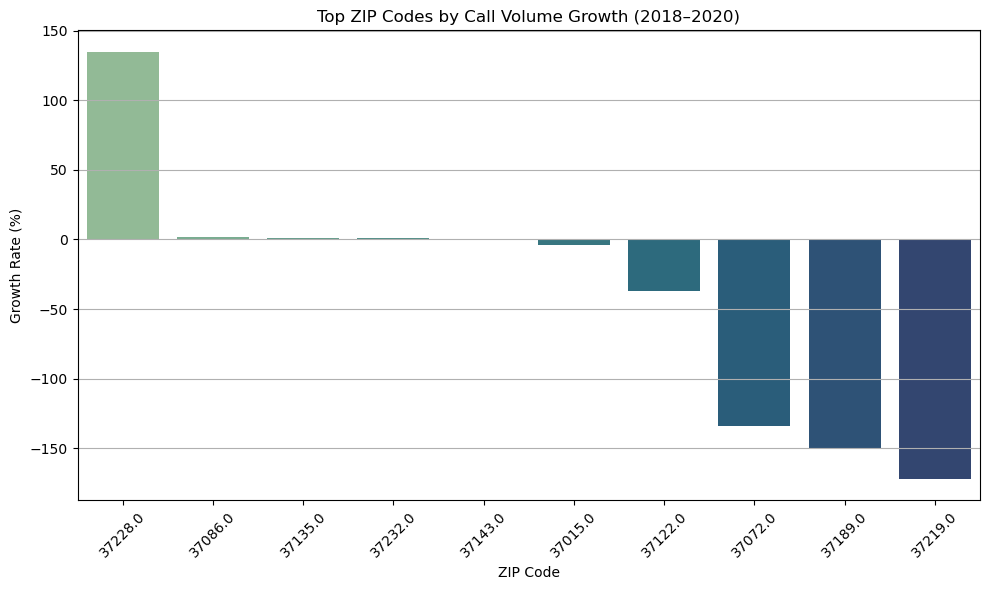

In [102]:
top_growth = calls_pivot_filtered.sort_values(by='Growth_Rate', ascending=False).head(10).reset_index()

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.barplot(data=top_growth, x='ZipCode', y='Growth_Rate', palette='crest', errorbar=None)
plt.title('Top ZIP Codes by Call Volume Growth (2018–2020)')
plt.ylabel('Growth Rate (%)')
plt.xlabel('ZIP Code')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.tight_layout()
plt.show()


## ZIP 37228 shows the most significant relative growth in call volumes from 2018 to 2020 (+135 calls, +135%).

## Several ZIPs such as 37086 and 37135 doubled their call counts, but from a very low base.

## ZIPs like 37219 and 37027 experienced sharp declines, possibly due to changes in population or reporting.

## Which types of calls are more likely to lead to confirmed incidents or arrests?

In [104]:
# 计算每种类型报警的总次数
total_calls = calls_df.groupby('Tencode_Description').size().reset_index(name='Total_Calls')
total_calls.head()

,Tencode_Description,Total_Calls
0,1000,111
1,14,509
2,15,37808
3,16,2485
4,2000,3


In [105]:
# 计算其中标记为 'ARREST' 或 'CONFIRMED' 的数量
confirmed_calls = calls_df[calls_df['Disposition_Description'].str.contains("ARREST|CONFIRMED|REPORT", na=False)]
confirmed_calls.head()

,OBJECTID,Event_Number,Complaint_Number,Tencode,Tencode_Description,Tencode_Suffix,Tencode_Suffix_Description,Disposition_Code,Disposition_Description,Block,...,Shift,Sector,ZONE_,Latitude,Longitude,RPA,Call_Received,x,y,Year
19,20,PD201800238971,2.018021e+10,70,BURGLARY - RESIDENCE,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,...,B,NaN,NaN,NaN,NaN,NaN,2018-03-07 02:43:41,NaN,NaN,2018
24,25,PD201800003015,NaN,45,VEHICLE ACCIDENT - PROPERTY DAMAGE,P,PROGRESS,1,M.P.D. REPORT COMPLED,NaN,...,C,331,325,36.069,-86.672,8899.0,2018-01-02 05:59:21,-86.672,36.069,2018
27,28,PD201800709018,2.018062e+10,50,THEFT,RC,NaN,1,M.P.D. REPORT COMPLED,NaN,...,A,NaN,NaN,NaN,NaN,NaN,2018-07-17 16:28:23,NaN,NaN,2018
65,66,PD201800685063,2.018060e+10,70,BURGLARY - RESIDENCE,R,REPORT,1,M.P.D. REPORT COMPLED,NaN,...,A,NaN,NaN,NaN,NaN,NaN,2018-07-10 14:08:43,NaN,NaN,2018
71,72,PD201800142266,NaN,45,VEHICLE ACCIDENT - PROPERTY DAMAGE,P,PROGRESS,1,M.P.D. REPORT COMPLED,NaN,...,C,MT,823,NaN,NaN,8609.0,2018-02-08 07:05:23,NaN,NaN,2018


In [106]:
confirmed_counts = confirmed_calls.groupby('Tencode_Description').size().reset_index(name='Confirmed_Incidents')
confirmed_counts.head()

,Tencode_Description,Confirmed_Incidents
0,1000,1
1,14,1
2,15,24
3,16,161
4,3,196


In [107]:
merged = pd.merge(total_calls, confirmed_counts, on='Tencode_Description', how='left').fillna(0)

In [108]:
# 计算转化率
merged['Confirmation_Rate'] = merged['Confirmed_Incidents'] / merged['Total_Calls']

In [109]:
# 查看前10个最有可能变成案件的报警类型
merged.sort_values(by='Confirmation_Rate', ascending=False).head(10)

,Tencode_Description,Total_Calls,Confirmed_Incidents,Confirmation_Rate
15,50,34113,21537.0,0.631343
94,THEFT,81511,48109.0,0.590215
70,GANG ACTIVITY,68,35.0,0.514706
79,OCCULT ACTIVITY,7,2.0,0.285714
37,77,18,5.0,0.277778
38,79,4,1.0,0.250000
36,75,2671,652.0,0.244103
99,VEHICLE ACCIDENT - PROPERTY DAMAGE,84150,20348.0,0.241806
78,MISSING PERSON,7838,1811.0,0.231054
41,85,13,3.0,0.230769


In [111]:
merged.to_csv("call_type_confirmation_rate.csv", index=False)


C:\Users\jingl\AppData\Local\Temp\ipykernel_33224\2541324065.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top10, x='Confirmation_Rate', y='Tencode_Description', palette='viridis', errorbar=None)


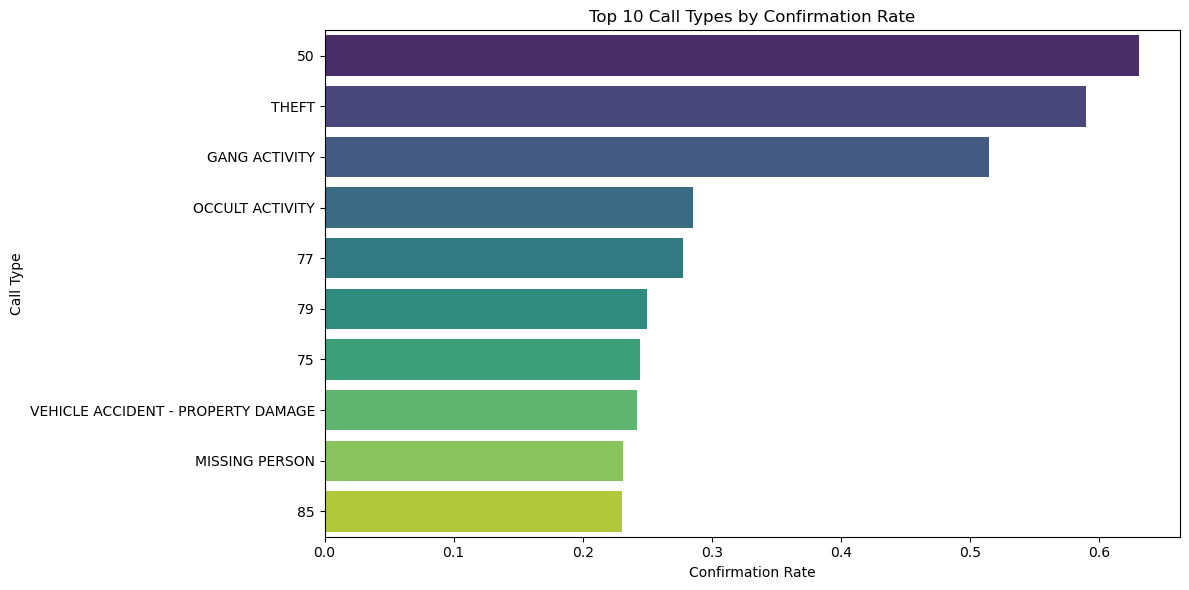

In [112]:
top10 = merged.sort_values(by='Confirmation_Rate', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.barplot(data=top10, x='Confirmation_Rate', y='Tencode_Description', palette='viridis', errorbar=None)
plt.title("Top 10 Call Types by Confirmation Rate")
plt.xlabel("Confirmation Rate")
plt.ylabel("Call Type")
plt.tight_layout()
plt.show()


##  "Among all call types, THEFT has both the highest volume and one of the highest confirmation rates (59%), indicating it is not only common but also frequently substantiated." "Rare but serious categories like GANG ACTIVITY also show high confirmation likelihood, warranting focused response strategies."

## Are certain call types more often confirmed by shift/sector?

In [113]:
# 标记是否确认为案件
calls_df['Is_Confirmed'] = calls_df['Disposition_Description'].str.contains("REPORT|ARREST|CONFIRMED", na=False)


In [116]:
by_shift_type = calls_df.groupby(['Shift', 'Tencode_Description']).agg(
    Total_Calls=('Event_Number', 'count'),
    Confirmed_Calls=('Is_Confirmed', 'sum')
).reset_index()

by_shift_type.head()

,Shift,Tencode_Description,Total_Calls,Confirmed_Calls
0,A,1000,91,1
1,A,14,483,1
2,A,15,20724,14
3,A,16,1130,100
4,A,2000,3,0


In [ ]:
by_shift_type['Confirmation_Rate'] = by_shift_type['Confirmed_Calls'] / by_shift_type['Total_Calls']

In [117]:
by_sector_type = calls_df.groupby(['Sector', 'Tencode_Description']).agg(
    Total_Calls=('Event_Number', 'count'),
    Confirmed_Calls=('Is_Confirmed', 'sum')
).reset_index()
by_sector_type.head()

,Sector,Tencode_Description,Total_Calls,Confirmed_Calls
0,0,1000,1,0
1,0,15,9,0
2,0,3,11,0
3,0,40,5,0
4,0,43,82,3


In [ ]:
by_sector_type['Confirmation_Rate'] = by_sector_type['Confirmed_Calls'] / by_sector_type['Total_Calls']

In [118]:
by_shift_type.to_csv("call_type_by_shift_confirmation.csv", index=False)
by_sector_type.to_csv("call_type_by_sector_confirmation.csv", index=False)


In [124]:
by_shift_type['Confirmation_Rate'] = by_shift_type['Confirmed_Calls'] / by_shift_type['Total_Calls']
by_shift_type['Confirmation_Rate'].head()

0    0.010989
1    0.002070
2    0.000676
3    0.088496
4    0.000000
Name: Confirmation_Rate, dtype: float64

In [125]:
by_sector_type['Confirmation_Rate'] = by_sector_type['Confirmed_Calls'] / by_sector_type['Total_Calls']
by_sector_type['Confirmation_Rate'].head()

0    0.000000
1    0.000000
2    0.000000
3    0.000000
4    0.036585
Name: Confirmation_Rate, dtype: float64

In [122]:
# 比如只保留通话数 ≥ 50 的记录
filtered_shift = by_shift_type[by_shift_type['Total_Calls'] >= 50]
filtered_sector = by_sector_type[by_sector_type['Total_Calls'] >= 50]


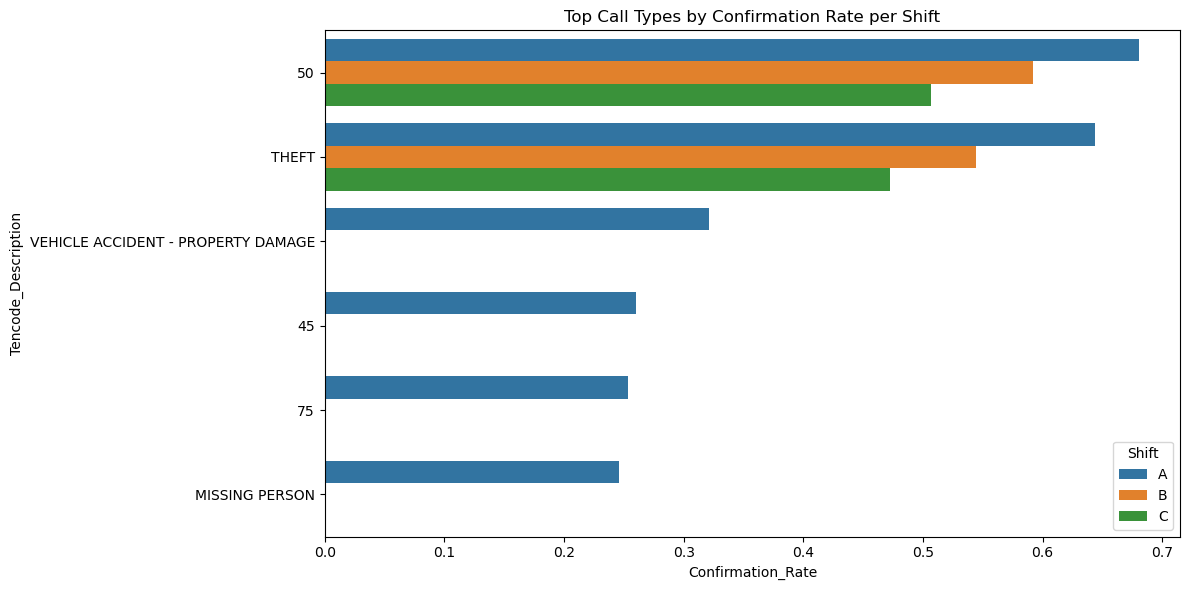

In [123]:
top_shift = filtered_shift.sort_values(by='Confirmation_Rate', ascending=False).head(10)

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
sns.barplot(data=top_shift, x='Confirmation_Rate', y='Tencode_Description', hue='Shift', errorbar=None)
plt.title("Top Call Types by Confirmation Rate per Shift")
plt.tight_layout()
plt.show()


In [126]:
filtered_shift.to_csv("call_type_by_shift_confirm_rate.csv", index=False)


## "Shift A consistently shows higher confirmation rates for several key call types, such as THEFT and GANG ACTIVITY." "This may indicate either higher incident density during Shift A or more effective incident verification by officers working that shift." "When filtered for types with >50 calls, THEFT remains the most confirmed type across all shifts."

## How call/crime trends change over time by shift/sector?

In [128]:
calls_df['Call_Received'] = pd.to_datetime(calls_df['Call_Received'], errors='coerce')
calls_df['Year'] = calls_df['Call_Received'].dt.year
# Optional: calls_df['Month'] = calls_df['Call_Received'].dt.to_period('M')


In [129]:
by_year_shift = calls_df.groupby(['Year', 'Shift']).agg(
    Total_Calls=('Event_Number', 'count'),
    Confirmed_Calls=('Is_Confirmed', 'sum')
).reset_index()



In [130]:

by_year_shift['Confirmation_Rate'] = by_year_shift['Confirmed_Calls'] / by_year_shift['Total_Calls']
by_year_shift['Confirmation_Rate'] 

0     0.111216
1     0.061645
2     0.025029
3     0.125625
4     0.080803
5     0.031293
6     0.123174
7     0.078388
8     0.033497
9     0.047354
10    0.019417
Name: Confirmation_Rate, dtype: float64

In [131]:
by_year_sector = calls_df.groupby(['Year', 'Sector']).agg(
    Total_Calls=('Event_Number', 'count'),
    Confirmed_Calls=('Is_Confirmed', 'sum')
).reset_index()



In [132]:
by_year_sector['Confirmation_Rate'] = by_year_sector['Confirmed_Calls'] / by_year_sector['Total_Calls']
by_year_sector['Confirmation_Rate'] 

0      0.035144
1      0.012121
2      0.000000
3      0.000000
4      0.000000
         ...   
217    0.018182
218    0.000000
219    0.000000
220    0.086957
221    0.000000
Name: Confirmation_Rate, Length: 222, dtype: float64

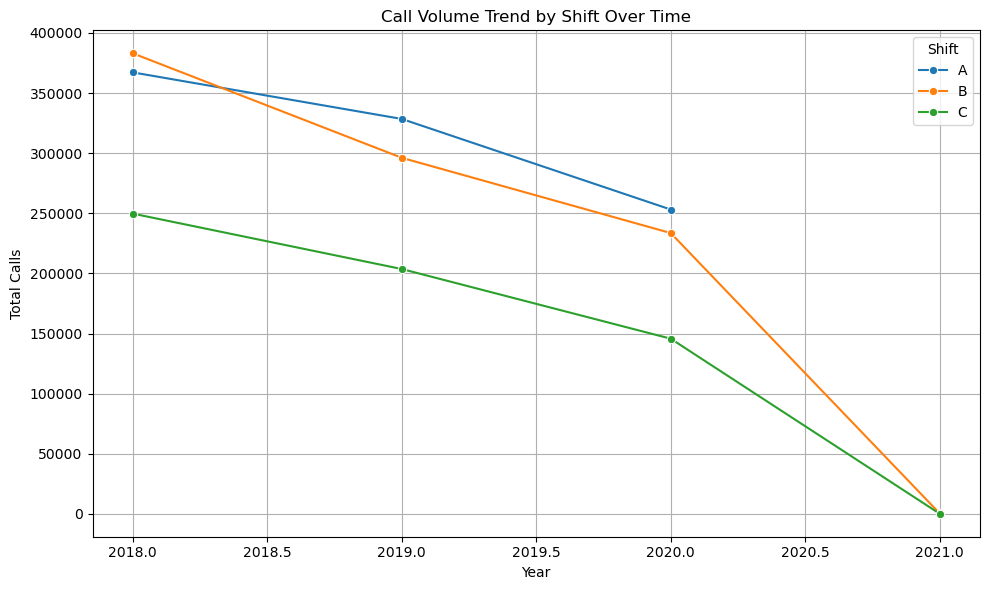

In [142]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.lineplot(data=by_year_shift, x='Year', y='Total_Calls', hue='Shift', marker='o')
plt.title("Call Volume Trend by Shift Over Time")
plt.ylabel("Total Calls")
plt.grid(True)
plt.tight_layout()
plt.show()


##"Overall, call volume has decreased year-over-year from 2018 to 2020 across all shifts. The sharp drop in 2021 is likely due to data incompleteness rather than actual incident decline. Shift A consistently handles the highest volume."

In [143]:
# 计算每个 sector 的平均总通话量
sector_avg = by_year_sector.groupby('Sector')['Total_Calls'].mean().reset_index()
top10_sectors = sector_avg.sort_values(by='Total_Calls', ascending=False).head(10)['Sector']

# 只保留前10名
filtered = by_year_sector[by_year_sector['Sector'].isin(top10_sectors)]


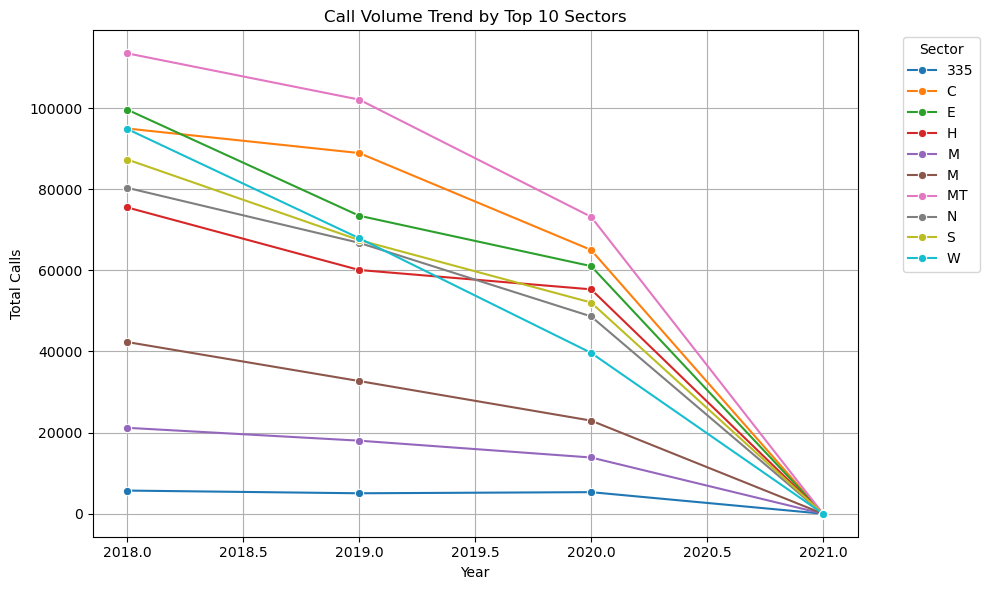

In [144]:
plt.figure(figsize=(10, 6))
sns.lineplot(data=filtered, x='Year', y='Total_Calls', hue='Sector', marker='o', palette='tab10')
plt.title("Call Volume Trend by Top 10 Sectors")
plt.ylabel("Total Calls")
plt.xlabel("Year")
plt.grid(True)
plt.legend(title='Sector', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


In [146]:
by_year_shift.to_csv("yearly_call_trend_by_shift.csv", index=False)


In [147]:
by_year_sector.to_csv("yearly_call_trend_by_sector.csv", index=False)